In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [27]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 10000 #meter
params.dist_threshold_min = 1000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_exp_income = 52.8 #euro
params.d2d.ini_exp_wt = 10 #minutes
params.d2d.ini_att = 0.5
params.d2d.res_wage_sp = 1
params.d2d.exp_income_sp = 1
params.d2d.exp_utility_eps = 0
params.d2d.veh_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.pax_omega = 0.10 # degree of learning: 0<omega<1
params.d2d.kappa = 1
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_fare = 1/14.67
params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 1.5
params.PT_fare = 1 ## euro
params.PT_speed  = 4 # m/s

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = 1.21 #euro/km
params.platforms.min_fare = 2 # euro
params.platforms.comm_rate = 0

params.d2d.learning_d = 1 #euro/km
params.d2d.B_Experience = 0.5
params.d2d.B_Marketing = 0.25
params.d2d.B_WOM = 0.25
params.d2d.diffusion_speed = 5/100 # this percentage should be a function of platfrom profit

params.nP = 2000
params.nV = 100
params.nD = 20
params.simTime = 4
params.d2d.res_wage = params.simTime*13.20 #euro

In [28]:
# sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

# sim = MaaSSim.simulators.simulate(params=params,f_trav_out=S_traveller_opt_out,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

11-06-22 13:49:34-WARNING-Setting up 4h simulation at 2022-06-11 11:49:12 for 100 vehicles and 2000 passengers in Amsterdam, Netherlands
11-06-22 13:49:41-WARNING-simulation time 2.4 s
11-06-22 13:49:42-WARNING-assertion tests for simulation results - passed
11-06-22 13:49:52-WARNING-simulation time 4.5 s
11-06-22 13:49:53-WARNING-assertion tests for simulation results - passed
11-06-22 13:50:06-WARNING-simulation time 7.3 s
11-06-22 13:50:07-WARNING-assertion tests for simulation results - passed
11-06-22 13:50:24-WARNING-simulation time 11.8 s
11-06-22 13:50:25-WARNING-assertion tests for simulation results - passed
11-06-22 13:50:46-WARNING-simulation time 16.4 s
11-06-22 13:50:47-WARNING-assertion tests for simulation results - passed
11-06-22 13:51:11-WARNING-simulation time 19.1 s
11-06-22 13:51:12-WARNING-assertion tests for simulation results - passed
11-06-22 13:51:36-WARNING-simulation time 19.3 s
11-06-22 13:51:37-WARNING-assertion tests for simulation results - passed
11-06

In [24]:
sim.res[0].pax_exp

,pre_rh_U,rh_U,alt_U,ACTUAL_WT,U_dif,OUT,mu,nDAYS_HAILED,EXPERIENCE_U,MARKETING_U,...,ACCEPTS_OFFER,REJECTS_OFFER,ARRIVES_AT_PICKUP,MEETS_DRIVER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,SETS_OFF_FOR_DEST,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,,,,,,,,
0,-0.503441,-0.470396,-0.503441,0.0,0.0,True,0.0,0.0,0.5,0.622459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.331581,-0.342413,-0.331581,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.396862,-0.391010,-0.396862,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.558656,-0.511439,-0.558656,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.635186,-0.568527,-0.635186,0.0,0.0,True,0.0,0.0,0.5,0.622459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.767966,-0.667234,-0.767966,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.583968,-0.530266,-0.583968,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.196580,-0.241635,-0.196580,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.380579,-0.378881,-0.380579,0.0,0.0,True,0.0,0.0,0.5,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

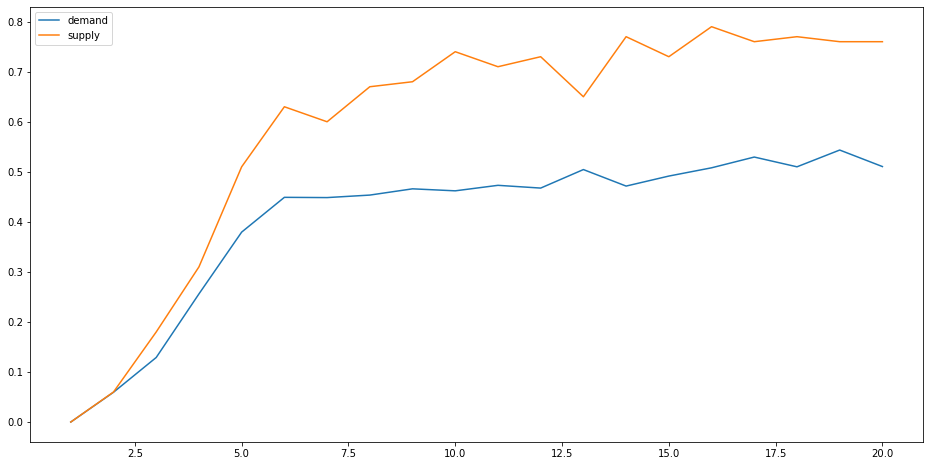

In [30]:
# with S-shaped curve

lyp = []
lyd = []

sim = sim
for d in range(0,sim.params.nD):
    lyp.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    lyd.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')
#ax.set_ylim([0,700])

<AxesSubplot:>

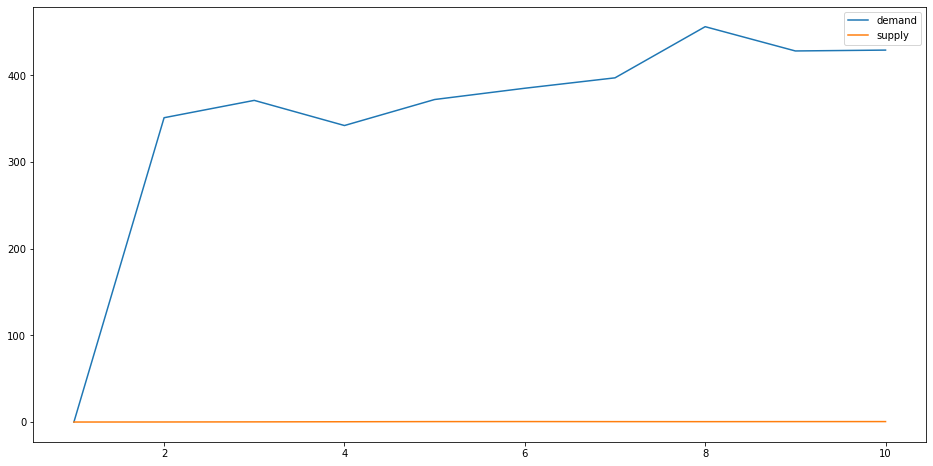

In [17]:
# with S-shaped curve

lyp = []
lyd = []

simx = sim2
for d in range(0,simx.params.nD):
    lyp.append(simx.res[d].pax_exp.OUT.value_counts().get(False, 0))
    lyd.append(simx.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
lx = [i for i in range(1,len(lyp)+1)]

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=lx, y=lyp, label = 'demand')#, marker='o')
sns.lineplot(x=lx, y=lyd, label = 'supply')#, marker='o')
#ax.set_ylim([0,700])

In [101]:
from numpy import log as ln

u = 0.5
b = 1
a = 1
# dif = (52.8-72.8)/52.8
dif = -0.277581#(-0.371136-(-5.5))/0.371136
# dif = (-1-(2))/1

e = 1/(1+math.exp(b*(ln((1/u)-1)+dif)))

b = 10
working_U = b*e
not_working_U = b*0.5

p = (math.exp(working_U))/(math.exp(working_U) + math.exp(not_working_U))
print('e= ',e)
p

e=  0.568953074363842


0.6658625302090586

In [ ]:
rh_U=  -5.5 alt_U=  -3.5


In [ ]:
rh_U = -params.d2d.get('B_fare',1)*rh_fare -params.d2d.get('B_inveh_time',1)*req.ttrav.total_seconds()/3600-params.d2d.get('B_exp_time',1)*exp_wait_t/60
alt_U = -params.d2d.get('B_fare',1)*params.PT_fare*req.dist/1000 -params.d2d.get('B_inveh_time',1)*(req.dist/params.PT_speed)/3600

rh_U = params.d2d.B_Experience*EXPERIENCE_U + params.d2d.B_Marketing*MARKETING_U + params.d2d.B_WOM*WOM_U
alt_U = params.d2d.B_Experience*0.5 + params.d2d.B_Marketing*0.5 + params.d2d.B_WOM*0.5

In [ ]:
req = pax.request
plat = sim.platforms.loc[1]
rh_fare = max(plat.get('base_fare',0) + plat.fare*req.dist/1000, plat.get('min_fare',0))

In [34]:
sim.pax[0].request

pax_id                                                          0
origin                                                 2425780832
destination                                            1558185438
treq                                          2022-06-11 08:51:22
tdep                                                          NaN
ttrav                                             0 days 00:05:52
tarr                                          2022-06-11 08:57:14
tdrop                                                         NaN
shareable                                                   False
schedule_id                                                   NaN
dist                                                         3528
ride_id                                                         0
position                                                        0
sim_schedule               node time  req_id    od
0          ...
Name: 0, dtype: object

In [37]:
sim.passengers

,pos,event,platforms,exp_utility_eps,learning,rh_U
pax,,,,,,
0,1558185438,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
1,1608998332,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
2,44813102,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
3,44846572,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
4,1566353645,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
5,2595466387,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
6,4244384215,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
7,44866801,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5
8,44822068,travellerEvent.ARRIVES_AT_DEST,[1],0.0,on,0.5


In [42]:
def ff(x):
    a = x*2
    b = x*3
    return (a,b)


ff(2)[1]

6